In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df=df.drop(columns=['ID#'])

In [4]:
df.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0


# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
x = scaling.fit_transform(df)
x
dt = pd.DataFrame(x)
dt.columns = df.columns
dt

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [7]:
from scipy.cluster import hierarchy

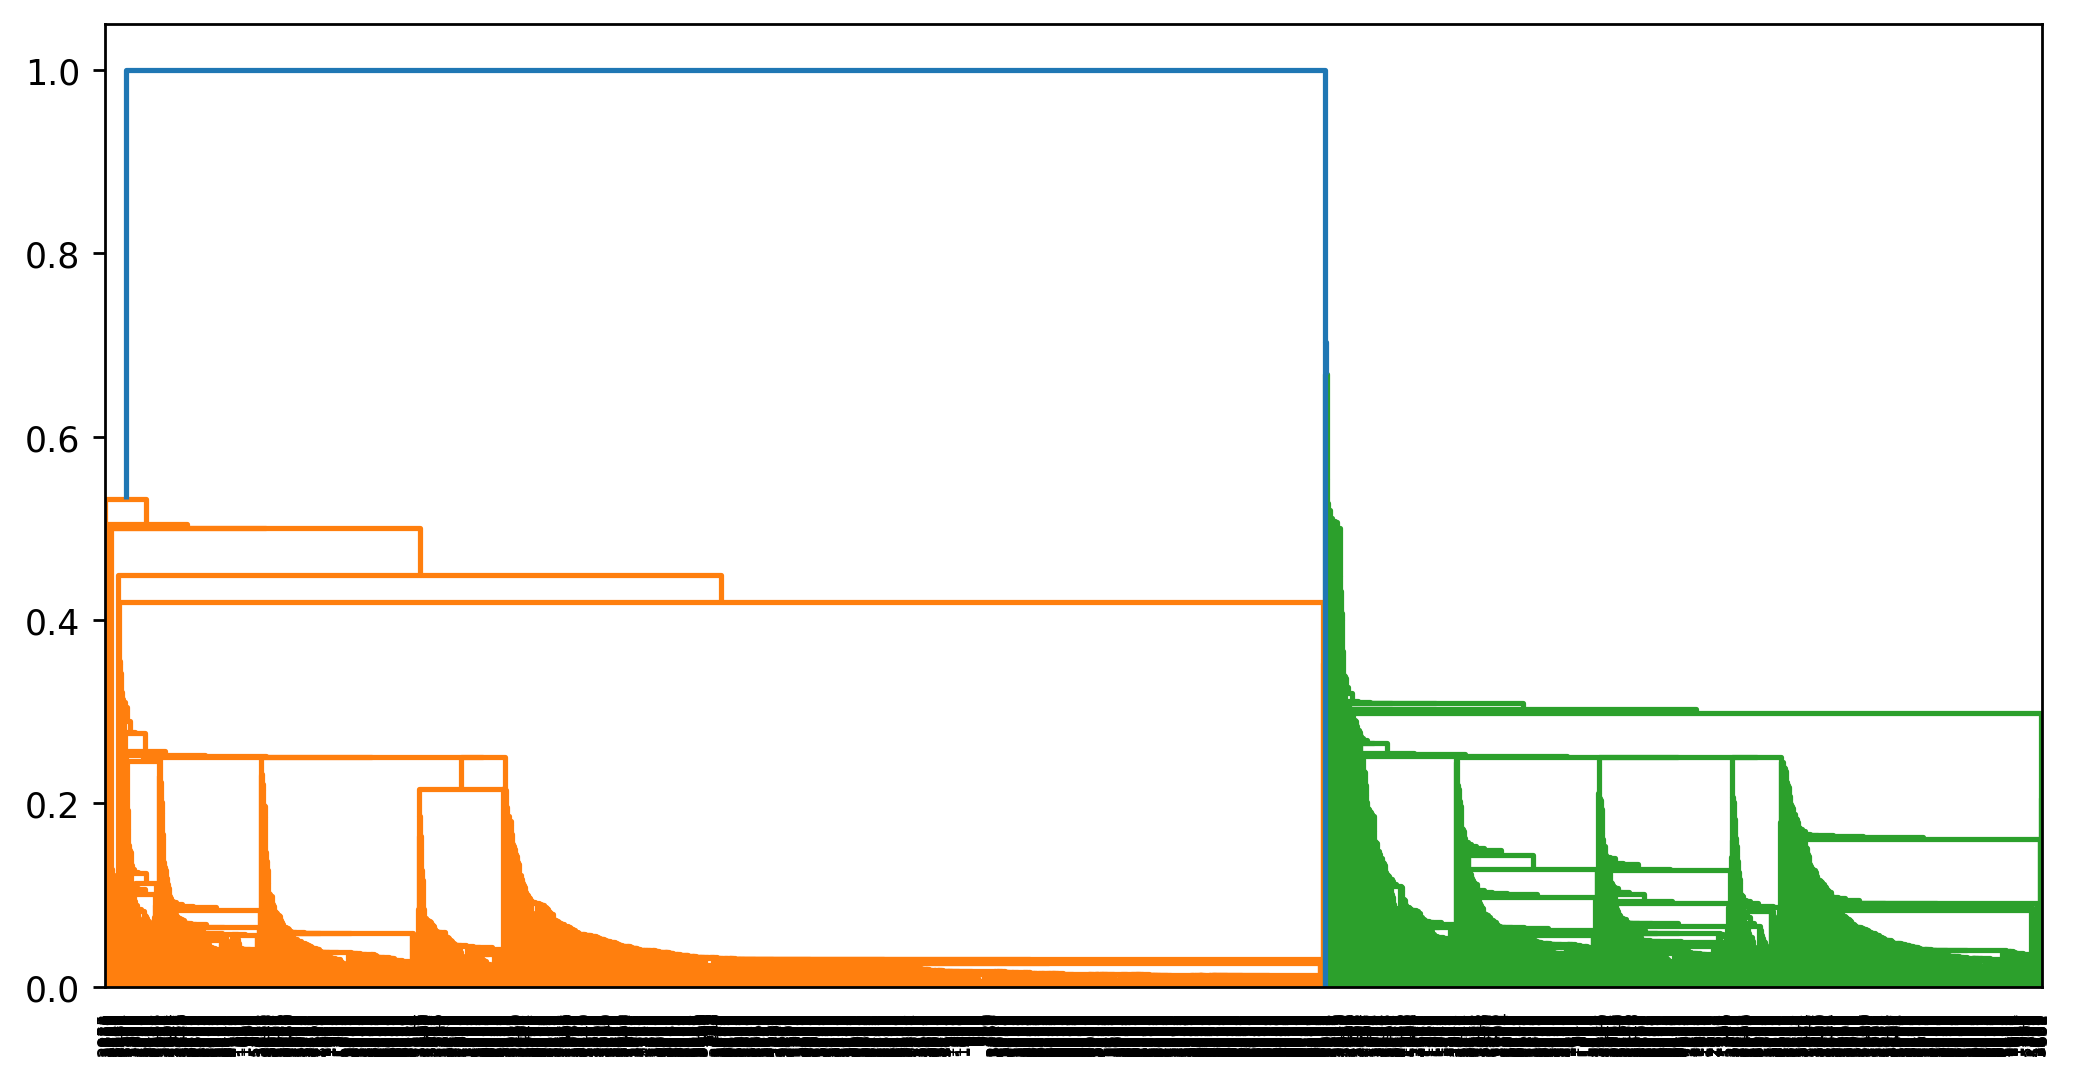

In [8]:
lk = hierarchy.linkage(dt)
dendrogram = hierarchy.dendrogram(lk)

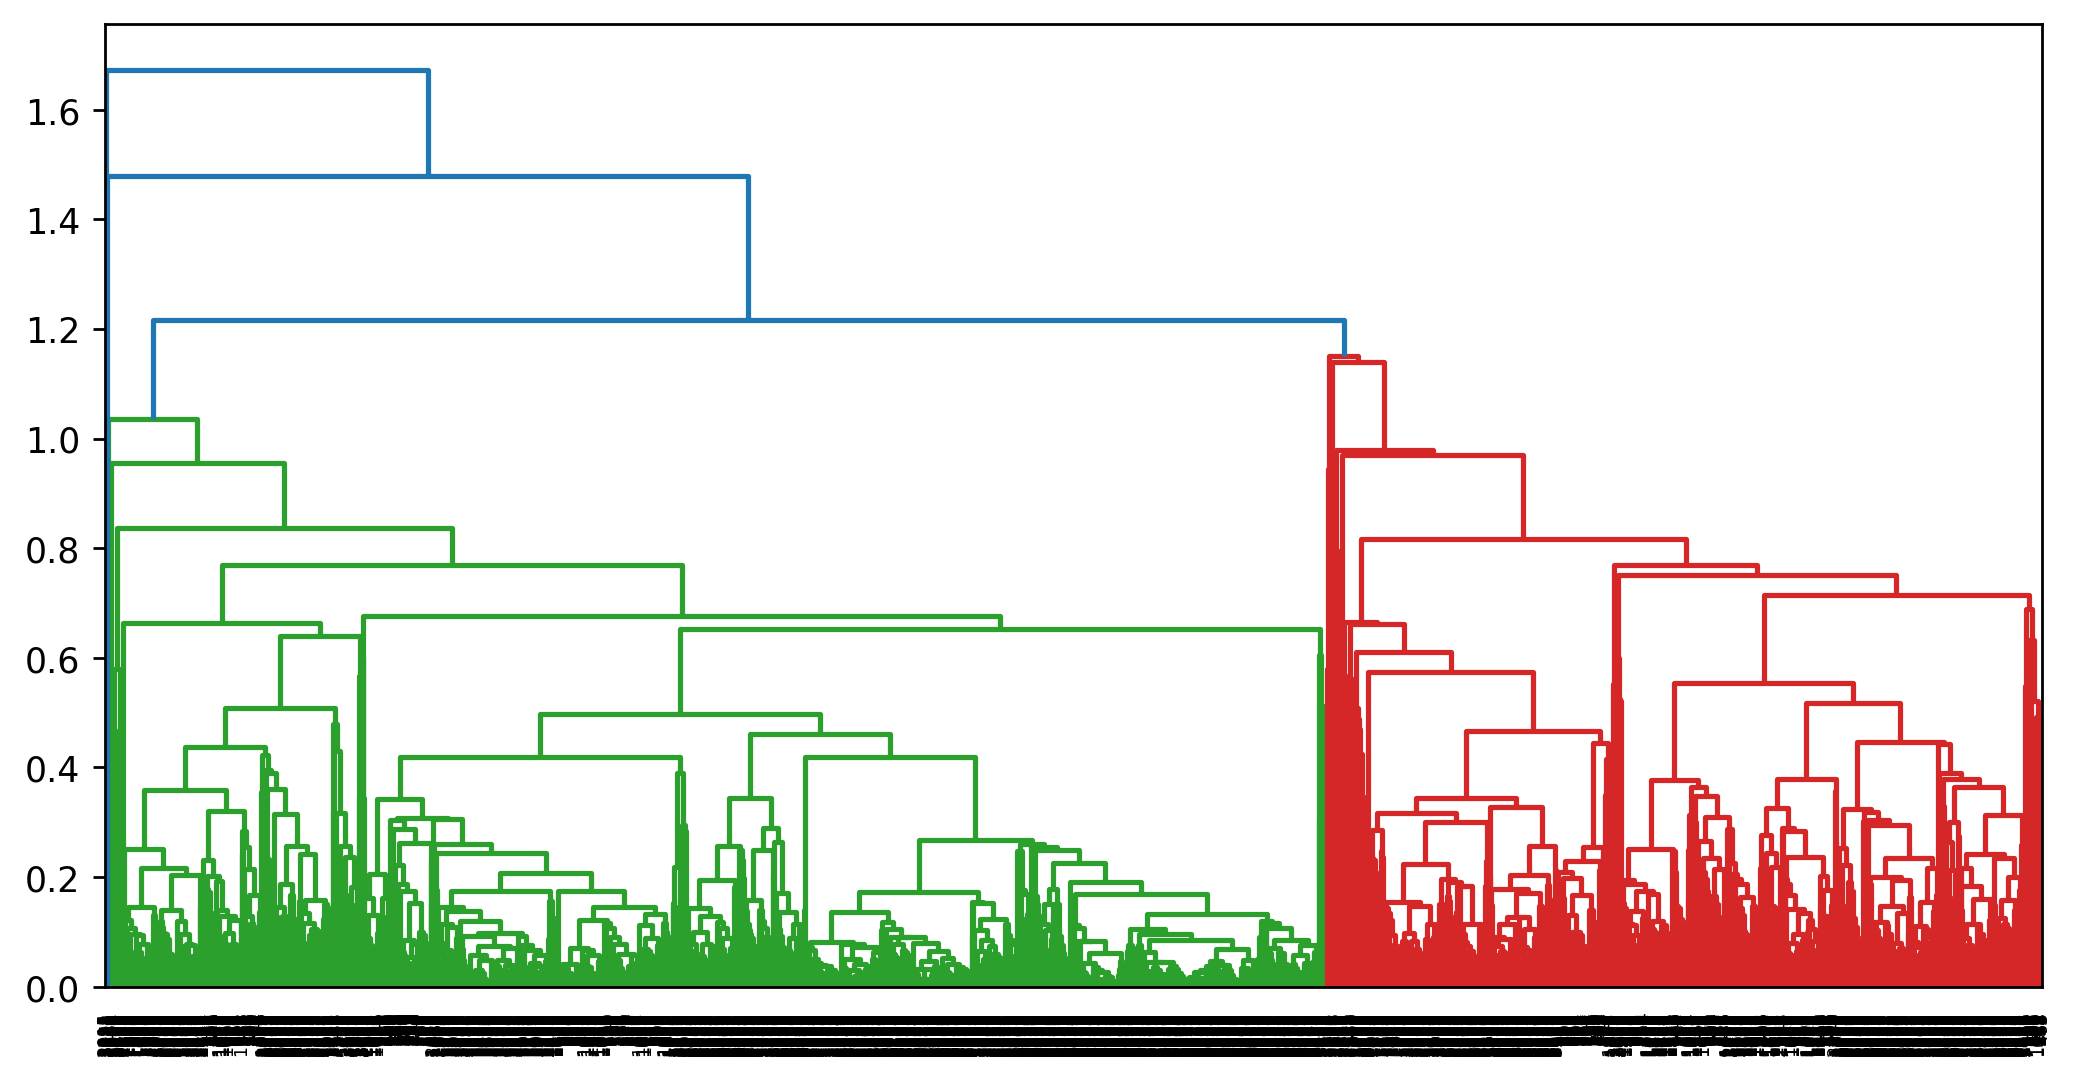

In [9]:
lk = hierarchy.linkage(dt, method='average')
dendrogram = hierarchy.dendrogram(lk)

# Model Building

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
hc=AgglomerativeClustering(n_clusters=3)
y= hc.fit_predict(dt)

In [12]:
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [13]:
df['Cluster']=y
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


# KMeans

In [14]:
from sklearn.cluster import KMeans
from scipy .spatial.distance import cdist

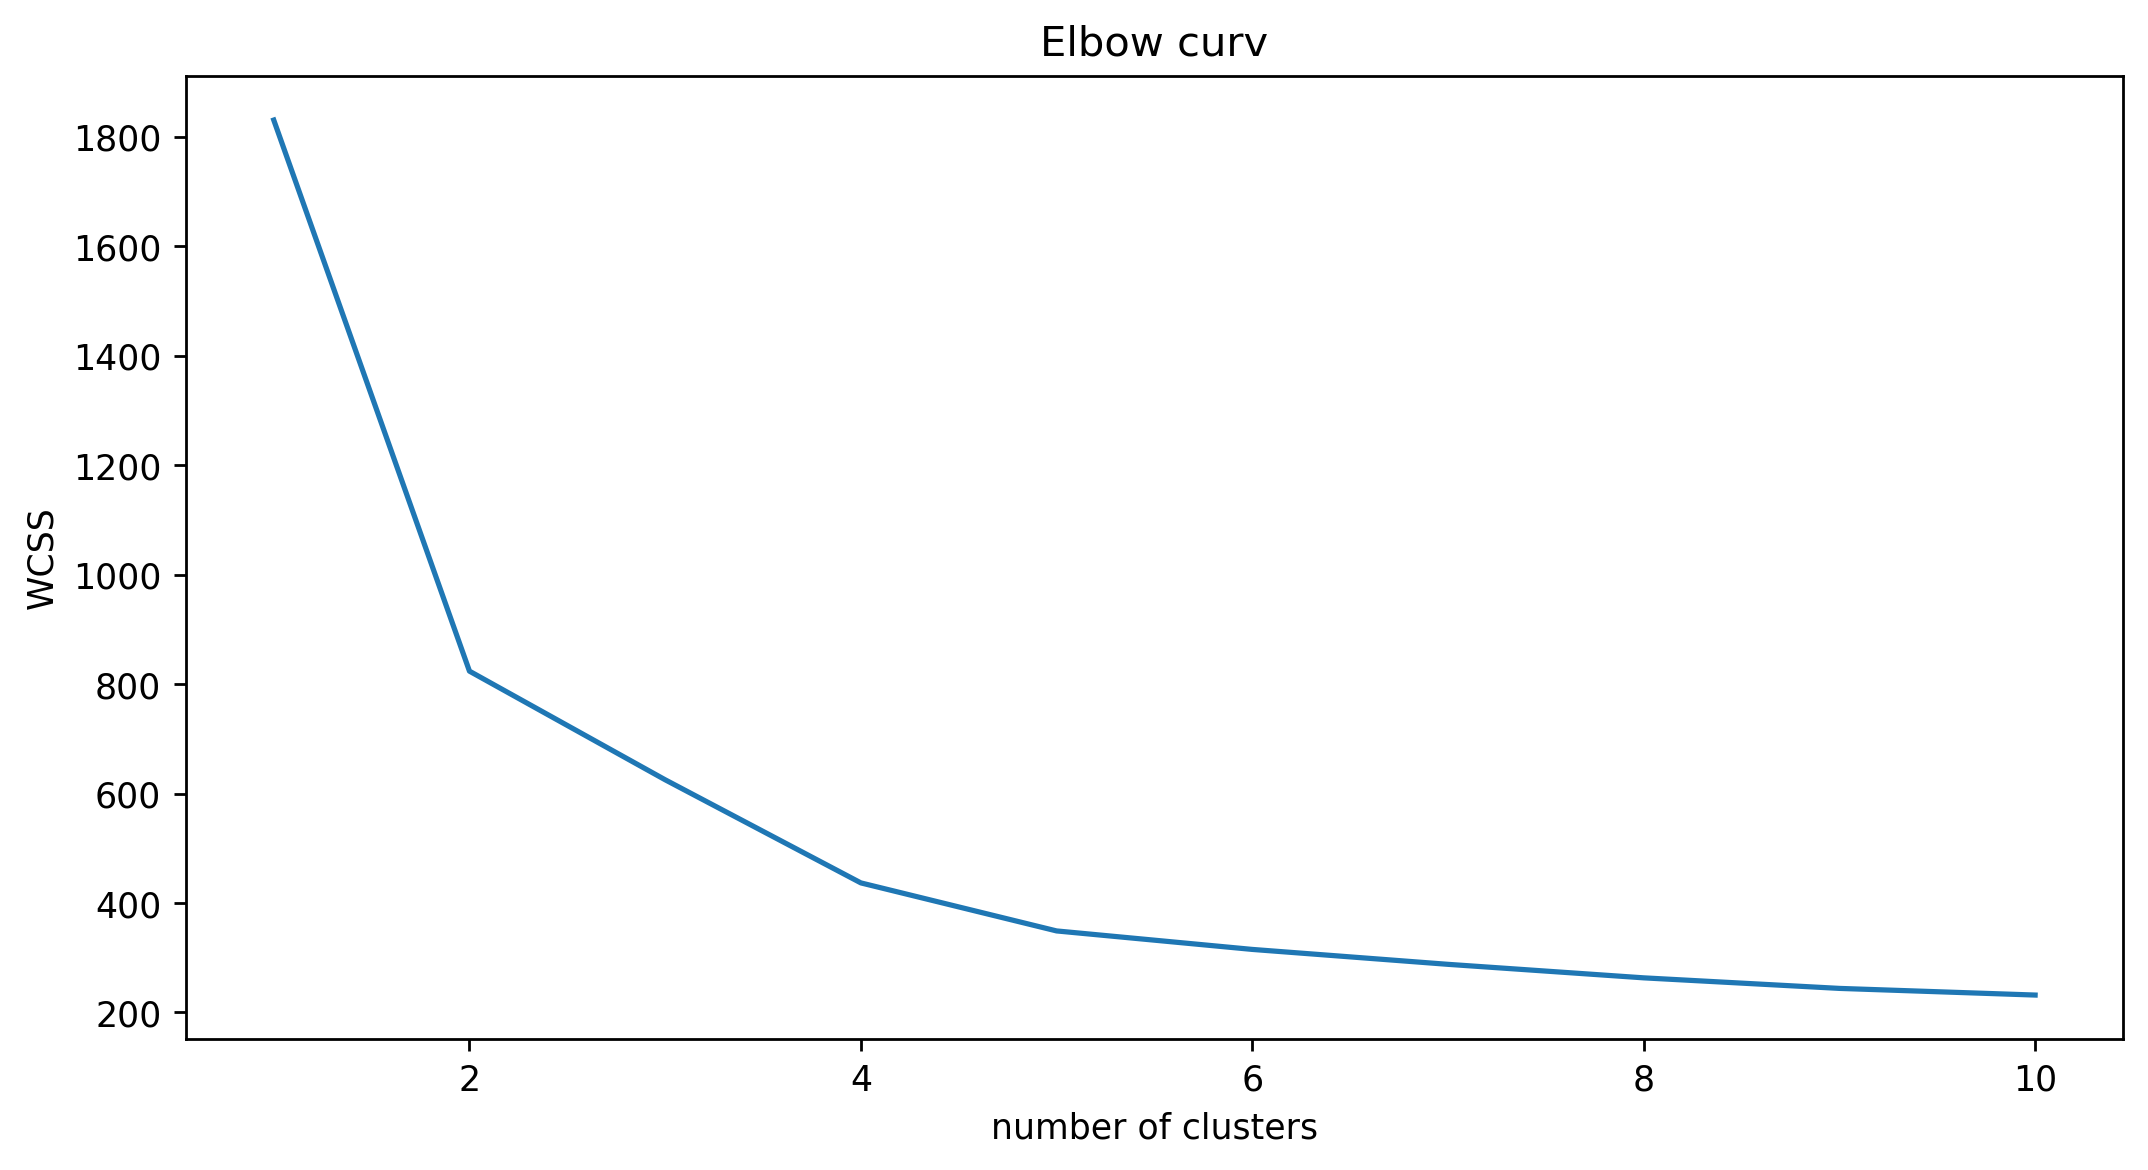

In [15]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(dt)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
model=KMeans(n_clusters=4)
model.fit(dt)
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [17]:
df.drop(columns=['Cluster'], inplace=True)
df.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0


In [18]:
df['Cluster']=model.labels_
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [19]:
df.iloc[:,0:4].groupby(df.Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles
Cluster,,,,
0,40747.617290,92.345809,1.092778,1.017923
1,108317.387376,198.336634,3.915842,1.001238
2,118032.061192,73.112721,3.576490,1.001610
3,83529.153046,290.453195,1.156018,1.032689


# DBscan

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
dq = pd.read_excel('EastWestAirlines.xlsx')
dq.head(1)

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN


In [22]:
dq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   East-West Airlines is trying to learn more about its customers.  Key issues are their  18 non-null     object
 1   Unnamed: 1                                                                             13 non-null     object
 2   Unnamed: 2                                                                             6 non-null      object
 3   Unnamed: 3                                                                             13 non-null     object
 4   Unnamed: 4                                                                             18 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [23]:
ds= dq.iloc[:,1:5]

In [24]:
ds.values

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       ['Data Type', 'Max Data Length',
        'Raw Data or Telcom Created Field?', 'Description'],
       ['NUMBER', nan, 'Telcom', 'Unique ID'],
       ['NUMBER', 8, 'Raw', 'Number of miles eligible for award travel'],
       ['NUMBER', 8, 'Raw',
        'Number of miles counted as qualifying for Topflight status'],
       ['CHAR', 1, 'Raw',
        'Number of miles earned with freq. flyer credit card in the past 12 months:'],
       ['CHAR', 1, 'Raw',
        'Number of miles earned with Rewards credit card in the past 12 months:'],
       ['CHAR', 1, 'Raw',
        'Number of miles earned with Small Business credit card in the past 12 months:'],
       [nan, nan, nan, '1 = under 5,000'],
       [nan, nan, nan, '2 = 5,000 - 10,000'],
       [nan, nan, na

In [36]:
x

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [37]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [38]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])
cl

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [40]:
ds1=pd.concat([dq,cl],axis=1)
ds1

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Cluster
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN,0
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,0
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
3994,NaN,NaN,NaN,NaN,NaN,0
3995,NaN,NaN,NaN,NaN,NaN,0
3996,NaN,NaN,NaN,NaN,NaN,0
3997,NaN,NaN,NaN,NaN,NaN,0


In [41]:
ds1.drop(columns=['ID#'],inplace=True)

KeyError: "['ID#'] not found in axis"

In [42]:
ds1.groupby('Cluster').agg('mean')

C:\Users\Amey\AppData\Local\Temp\ipykernel_6588\27366907.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  ds1.groupby('Cluster').agg('mean')


""
Cluster
0
